### Implement a H gate using RZ and RX gates only. 

In [10]:
import pennylane as qml
import numpy as np

In [11]:
dev = qml.device("default.qubit", wires=1)

phi, theta, omega = np.pi/2,-np.pi/2,-np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

qnode = qml.QNode(hadamard_with_rz_rx, dev)()
print (qnode)
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.Hadamard(wires=0)
    return qml.state()

qnode = qml.QNode(hadamard_with_rz_rx, dev)()
print (qnode)
dev = qml.device("default.qubit", wires=1)

phi, theta, omega = np.pi/2,np.pi/2,np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

qnode = qml.QNode(hadamard_with_rz_rx, dev)()
phi = np.pi/2
print (np.round((qnode*(np.cos(phi)+1j*np.sin(phi))),5))

[0.70710678+0.00000000e+00j 0.70710678+1.11022302e-16j]
[0.70710678+0.j 0.70710678+0.j]
[0.70711+0.j 0.70711-0.j]


### Convert a single qubit circuit with H, S, $T^\dagger$ and PauliY gate to RZ and RX only

[0.5-0.5j        0. +0.70710678j]


(<Figure size 600x200 with 1 Axes>, <Axes: >)

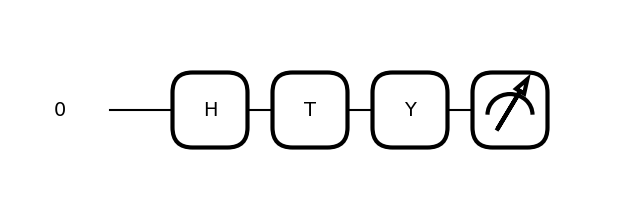

In [12]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def convert_to_rz_rx():
    qml.Hadamard(0)
    qml.T(0)
    qml.PauliY(0)
    return qml.state()

qnode = qml.QNode(convert_to_rz_rx, dev)()
print (qnode)
qml.draw_mpl(convert_to_rz_rx)()

[0.5-0.5j        0. +0.70710678j]


(<Figure size 1000x200 with 1 Axes>, <Axes: >)

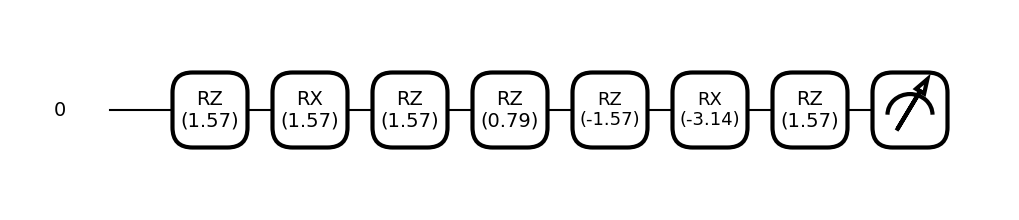

In [13]:
dev1 = qml.device("default.qubit", wires=1)
@qml.qnode(dev1)
def convert_to_rz_rx():
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)
    qml.RZ(np.pi/4, wires=0)

    qml.RZ(-np.pi/2, wires=0)
    qml.RX(-np.pi, wires=0)
    qml.RZ(np.pi/2, wires=0)
    
    return qml.state()

qnode = qml.QNode(convert_to_rz_rx, dev1)()
HPhase= (np.cos(phi)+1j*np.sin(phi))
RZ_T_Phase = np.cos(np.pi/8)+1j*np.sin(np.pi/8)
RZ_S_Phase = np.cos(np.pi/4)+1j*np.sin(np.pi/4)
RZ_S_Phase_M = np.cos(-np.pi/4)+1j*np.sin(-np.pi/4)
print (np.round((qnode*HPhase*RZ_T_Phase*RZ_S_Phase*-1j*RZ_S_Phase_M), 10))
qml.draw_mpl(convert_to_rz_rx, decimals=2)()
